First we want to read our csv file containing the relevant temperature data time series to train our machine Learning model.

In [172]:
data <- read.csv("Desktop/weather.csv", header = T)

In [173]:
head(data)

maxtempC,mintempC,tstest,c.0..0..c.,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7
27,26,27,0.0,NA,NA,NA,,,,NA,NA
27,26,28,0.0,NA,NA,NA,,,,NA,NA
27,26,28,28.2,NA,NA,NA,,,,NA,NA
27,26,29,28.1,NA,NA,NA,,,,NA,NA
28,26,29,28.8,NA,NA,NA,,,,NA,NA
28,26,29,29.0,NA,NA,NA,,,,NA,NA


We note that there are extra NA columns in the csv file and remove those from our data frame below

In [174]:
data = data[,1:4]
head(data)


maxtempC,mintempC,tstest,c.0..0..c.
27,26,27,0.0
27,26,28,0.0
27,26,28,28.2
27,26,29,28.1
28,26,29,28.8
28,26,29,29.0


Now we filter out only the maximum tempeprature data and store it in datamax

In [175]:
datamax <- data[,1]
head(datamax)
tail(datamax)

[1] 27 27 27 27 28 28

[1] 32.4 29.6 30.5 28.0 26.2 28.4

In [176]:
datamin <- data[,2]
head(datamin)
tail(datamin)

[1] 26 26 26 26 26 26

[1] 26.5 25.0 24.5 25.3 25.0 25.0

Sequentially partition the dataset into training (70%) and testing data (30%)

In [177]:
trainingmax <- datamax[1:2990]
testingmax <- datamax[2991:4387]
trainingmin <- datamin[1:2990]
testingmin <- datamin[2991:4387]
# adding recent values recorded from the weather station
testingmax<-c(testingmax, c(27.8, 30.2, 32, 31.8, 31.5, 32.2, 31.8, 28.4, 30.8, 31, 28, 26.8, 30, 31))
testingmin<-c(testingmin, c(25.3, 23.4, 25.5, 27, 27, 27.2, 25.5, 26, 25.5, 25.5, 25.5, 25, 25, 25.5))

Now we want to work with the time series data using various time series functionalities so we convert it into a time series. We expect roughly yearly seasonality so our frequency is 365 and the start is when our data begins, which is the 183rd day of the year 2008.

In [178]:
tsmax <- ts(datamax, frequency = 365, start = c(2008,183))
tsmin <- ts(datamin, frequency = 365, start = c(2008,183))

We want to visualise our time series and understand various patterns within it

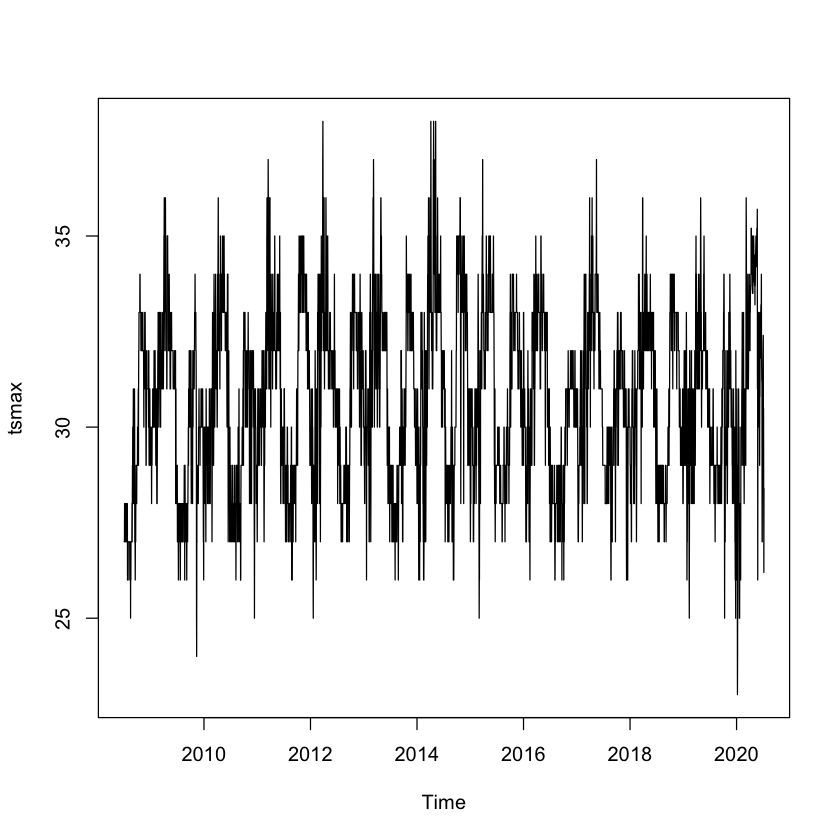

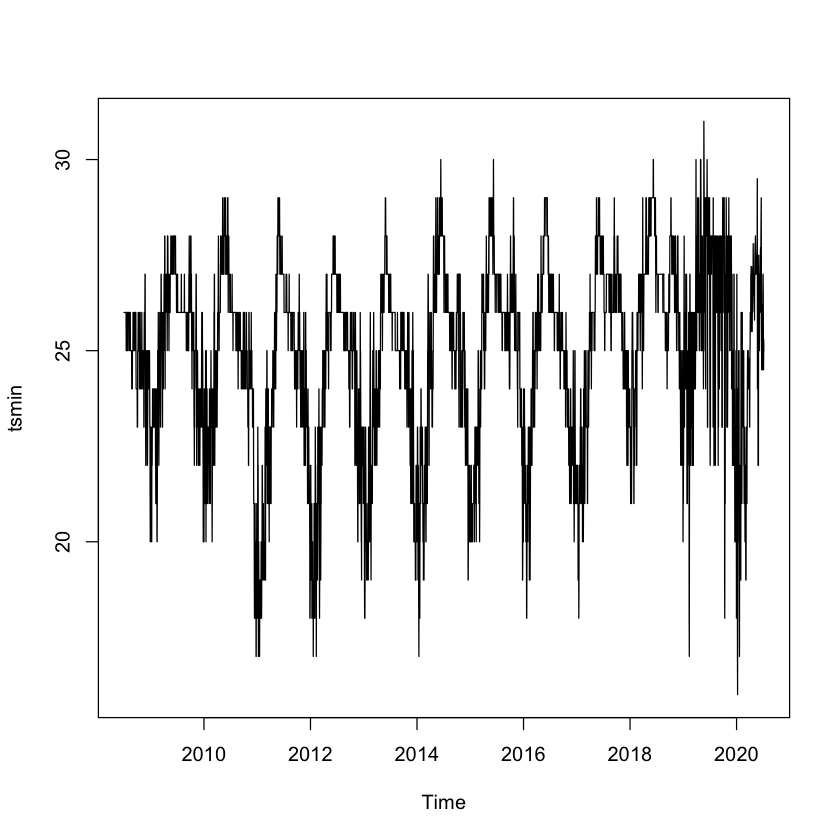

In [179]:
plot(tsmax)
plot(tsmin)

We also want to smooth the time series as it is highly noisy and we want to capture a general trend in the maximum and minimum temperature data. We accomplish this using the triangular moving average.

In [180]:
library(zoo)
ts2max <- ts(rollmean(rollmean(tsmax,2),2),frequency = 365, start = c(2008,183))
ts2min <- ts(rollmean(rollmean(tsmin,2),2),frequency = 365, start = c(2008,183))


Now we want to visualise this data on the same graph

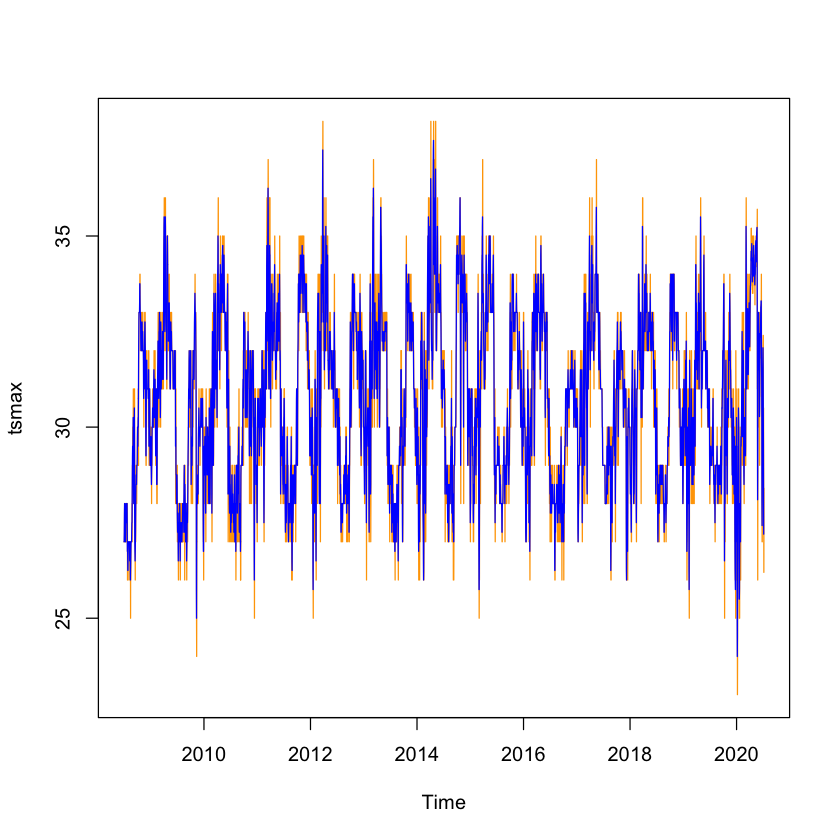

In [181]:
plot(tsmax, col = 'orange')
lines(ts2max, col = 'blue')

Carrying out the augmented dickey-fuller test on our time series for stationarity

In [182]:
install.packages("timeSeries")
library(timeSeries)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [183]:
install.packages("aTSA")
library(aTSA)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [184]:
adf.test(tsmin)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
      lag    ADF p.value
 [1,]   0 -1.378   0.186
 [2,]   1 -1.189   0.254
 [3,]   2 -1.045   0.306
 [4,]   3 -0.905   0.355
 [5,]   4 -0.810   0.389
 [6,]   5 -0.729   0.418
 [7,]   6 -0.660   0.443
 [8,]   7 -0.613   0.460
 [9,]   8 -0.579   0.472
[10,]   9 -0.554   0.481
Type 2: with drift no trend 
      lag    ADF p.value
 [1,]   0 -14.40    0.01
 [2,]   1 -12.59    0.01
 [3,]   2 -11.18    0.01
 [4,]   3  -9.71    0.01
 [5,]   4  -8.71    0.01
 [6,]   5  -7.85    0.01
 [7,]   6  -7.13    0.01
 [8,]   7  -6.64    0.01
 [9,]   8  -6.28    0.01
[10,]   9  -6.03    0.01
Type 3: with drift and trend 
      lag    ADF p.value
 [1,]   0 -14.58    0.01
 [2,]   1 -12.76    0.01
 [3,]   2 -11.33    0.01
 [4,]   3  -9.85    0.01
 [5,]   4  -8.84    0.01
 [6,]   5  -7.97    0.01
 [7,]   6  -7.25    0.01
 [8,]   7  -6.75    0.01
 [9,]   8  -6.39    0.01
[10,]   9  -6.13    0.01
---- 
Note: in fact, p.value = 0

In [185]:
adf.test(tsmax)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
      lag    ADF p.value
 [1,]   0 -1.128   0.276
 [2,]   1 -1.012   0.317
 [3,]   2 -0.866   0.370
 [4,]   3 -0.746   0.412
 [5,]   4 -0.671   0.439
 [6,]   5 -0.615   0.459
 [7,]   6 -0.550   0.482
 [8,]   7 -0.529   0.490
 [9,]   8 -0.494   0.502
[10,]   9 -0.452   0.514
Type 2: with drift no trend 
      lag    ADF p.value
 [1,]   0 -16.24    0.01
 [2,]   1 -14.96    0.01
 [3,]   2 -13.11    0.01
 [4,]   3 -11.63    0.01
 [5,]   4 -10.48    0.01
 [6,]   5  -9.81    0.01
 [7,]   6  -9.00    0.01
 [8,]   7  -8.77    0.01
 [9,]   8  -8.36    0.01
[10,]   9  -8.03    0.01
Type 3: with drift and trend 
      lag    ADF p.value
 [1,]   0 -16.25    0.01
 [2,]   1 -14.97    0.01
 [3,]   2 -13.12    0.01
 [4,]   3 -11.63    0.01
 [5,]   4 -10.49    0.01
 [6,]   5  -9.82    0.01
 [7,]   6  -9.00    0.01
 [8,]   7  -8.77    0.01
 [9,]   8  -8.36    0.01
[10,]   9  -8.03    0.01
---- 
Note: in fact, p.value = 0

Since the p value is less than 5% for the "with drift and trend" test we can reject the null hypothesis that there is a unit root. Since there are no unit roots are time series is stationary. This allows us to use ARIMA(p,q) models on our time series data.

We also carry out the kpss test to further confirm level stationarity of the data

In [186]:
kpss.test(tsmax)

KPSS Unit Root Test 
alternative: nonstationary 
 
Type 1: no drift no trend 
 lag stat p.value
  15 1.88  0.0379
----- 
 Type 2: with drift no trend 
 lag stat p.value
  15 0.15     0.1
----- 
 Type 1: with drift and trend 
 lag  stat p.value
  15 0.107     0.1
----------- 
Note: p.value = 0.01 means p.value <= 0.01 
    : p.value = 0.10 means p.value >= 0.10 


This indicates that the data might be stationary as we cannot reject the null hypothesis that the data is stationary.

In [187]:
#converting the training data into a time series
tstrain <- ts(trainingmax, frequency = 365, start = c(2008,183))
#smoothing the training time series using triangular moving average
smoothmaxtrain <- ts(rollmean(rollmean(tstrain,2),2))
#converting the testing data into a time series
tstest <- ts(testingmax, frequency = 365, start = c(2016,252))
#smoothing the testing time series using triangular moving average
smoothmaxtest <- ts(rollmean(rollmean(tstest,2),2))

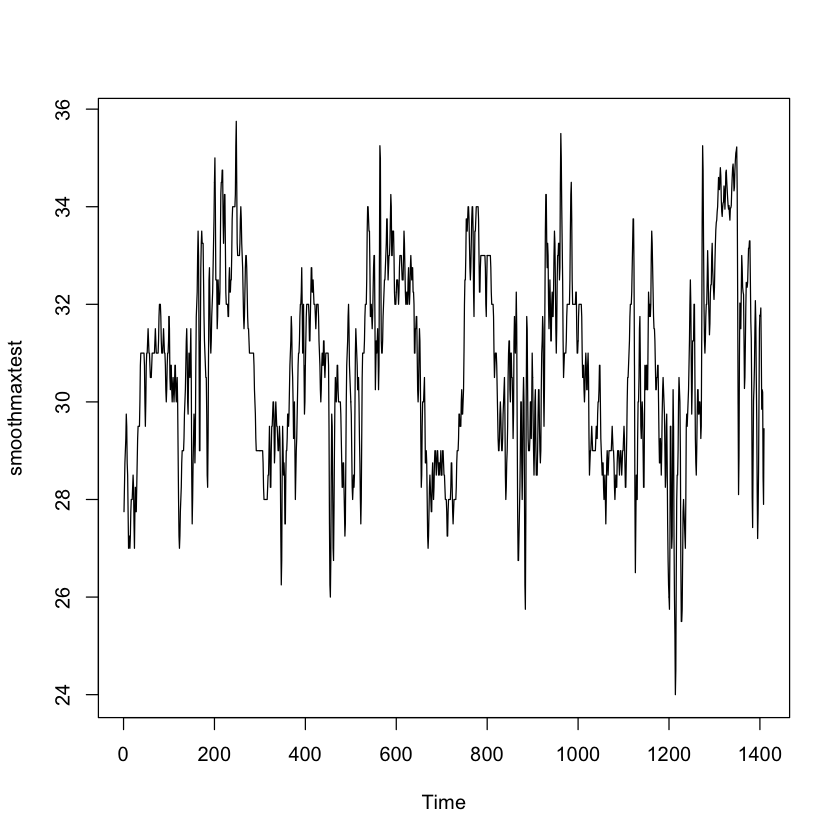

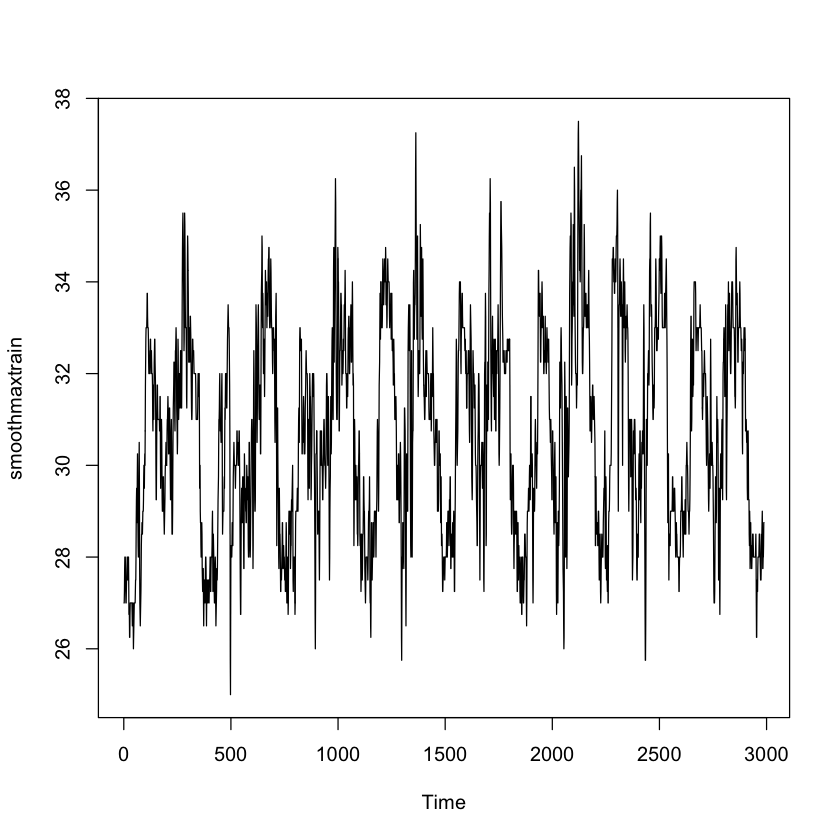

In [188]:
plot(smoothmaxtest)
plot(smoothmaxtrain)

We fit our training data to the ARMA(2,2) model. Hyperparameters were calculated by trial and error.

In [189]:
fitmax <- arima(trainingmax, c(2,0,2))
fitmin <- arima(trainingmin, c(2,0,2))
summary(fitmax)
summary(fitmin)

Warning message in arima(trainingmax, c(2, 0, 2)):
“possible convergence problem: optim gave code = 1”


Call:
arima(x = trainingmax, order = c(2, 0, 2))

Coefficients:
         ar1      ar2      ma1      ma2  intercept
      1.5076  -0.5172  -0.7012  -0.1054    30.6574
s.e.  0.0469   0.0452   0.0485   0.0260     0.3652

sigma^2 estimated as 1.011:  log likelihood = -4259.81,  aic = 8531.63

Training set error measures:
                      ME     RMSE       MAE         MPE     MAPE     MASE
Training set 0.003354468 1.005455 0.7345306 -0.09675004 2.404566 1.040034
                     ACF1
Training set 0.0004316452

Call:
arima(x = trainingmin, order = c(2, 0, 2))

Coefficients:
         ar1      ar2      ma1      ma2  intercept
      1.5756  -0.5794  -0.7808  -0.0719    24.6374
s.e.  0.0351   0.0345   0.0371   0.0241     0.5689

sigma^2 estimated as 0.6883:  log likelihood = -3685.4,  aic = 7382.8

Training set error measures:
                        ME      RMSE       MAE        MPE     MAPE     MASE
Training set -0.0005938272 0.8296438 0.5868892 -0.1314235 2.485028 1.078851
         

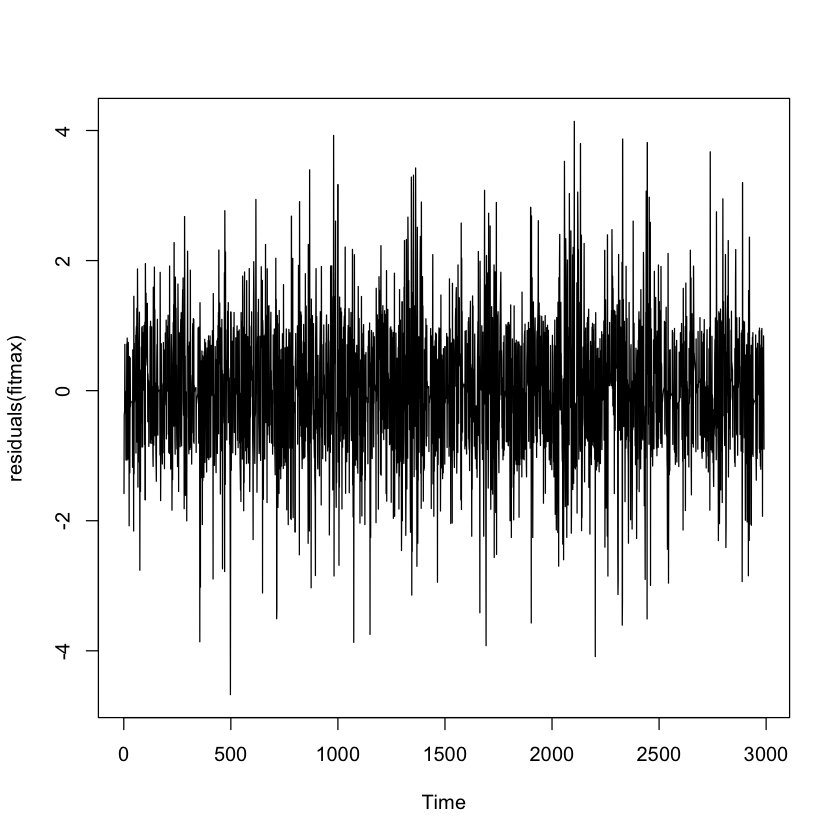

In [190]:
plot(residuals(fitmax))

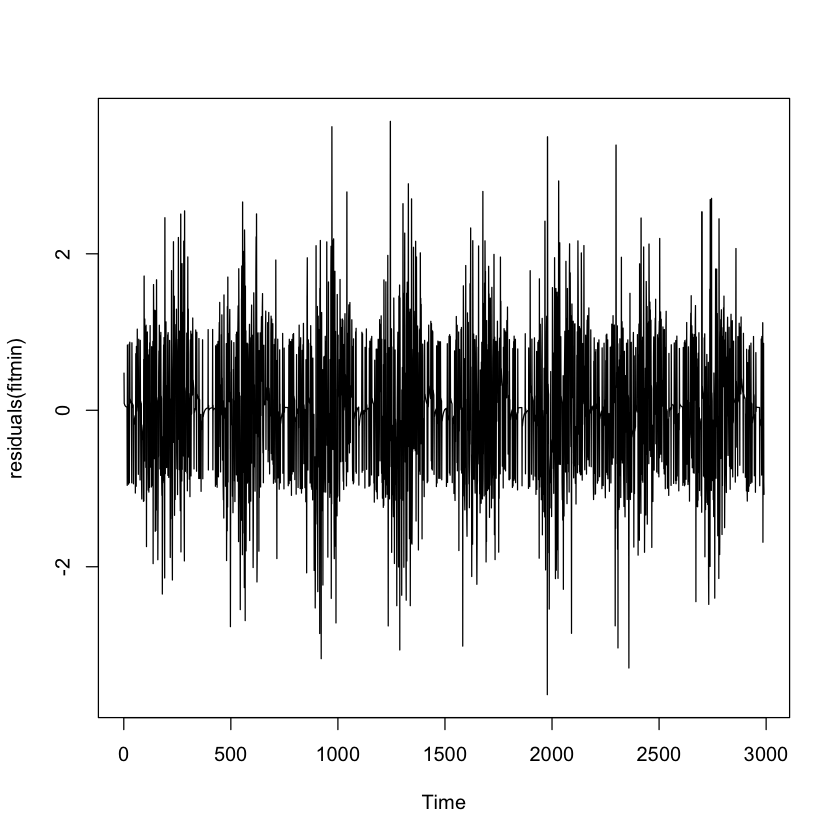

In [191]:
plot(residuals(fitmin))

Now we calculate the RMS error of the ARMA model

In [192]:
library(forecast)

In [193]:
accuracy(fitmax)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.003354468,1.005455,0.7345306,-0.09675004,2.404566,1.040034,0.0004316452


In [194]:
accuracy(fitmin)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.0005938272,0.8296438,0.5868892,-0.1314235,2.485028,1.078851,0.00286424


Applying our previously derived ARMA model on the testing dataset to check for its accuracy

In [195]:
testingmodelmax<-Arima(testingmax, model = fitmax)
#calculating the accuracy of our model on the testing data
testingmodelmin<-Arima(testingmin, model = fitmin)

In [196]:
accuracy(testingmodelmax)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.005022987,1.035682,0.7334778,-0.09235644,2.420295,1.046341,-0.02838435


In [197]:
accuracy(testingmodelmin)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.02244925,1.214866,0.7979187,-0.1208536,3.253299,1.035304,-0.1114093


Forecasting values displayed

In [198]:
c <- fitted(testingmodelmax)
df <- data.frame(c, testingmax)